In [ ]:
import sympy as sp
import numpy as np

# SymPy Overview

Andrew Bahsoun & Max Richter

12/19/24

## Introduction to SymPy

`sympy` stand for "Symbolic Python" and is a powerful module for performing analytic mathematical calculations without the constraints of usual numeric types. By convention, its name is shortened to `sp` when imported (see the top cell) so you can type less. (Similarly above, the module "Numeric Python" `numpy` is shortened to `np` by convention.)

## Symbols and Expressions

The simplest use for `sympy` is to manipulate "expressions" containing algebraic variables. You need to declare which text symbols should be treated as mathematical symbols as follows:

In [ ]:
x, y, z, t = sp.symbols("x, y, z, t")

In [ ]:
type(x)

sympy.core.symbol.Symbol

Then you can make "expressions" by combining symbols with usual mathematical operators, or implementations of functions contained in `sympy`:

In [ ]:
e1 = x + 1

In [ ]:
type(e1)

sympy.core.add.Add

In [ ]:
e1

x + 1

You can combine operations to make more complicated expressions, which are stored as a tree of operations. So this "Add" expression becomes part of a "Mul" expression for the outer-most multiplication below.

In [ ]:
type(e1 * y)

sympy.core.mul.Mul

In [ ]:
e1 * y

y*(x + 1)

If you're curious, you can always expand out the full expression tree to see how it is constructed:

In [ ]:
sp.srepr(e1 * y)

"Mul(Symbol('y'), Add(Symbol('x'), Integer(1)))"

You can do rudimentary simplification operations on algebraic expressions, like expanding an expression by distributing the product through the sum:

In [ ]:
sp.expand(e1*y)

x*y + y

or factoring an expression into a product of common factors:

In [ ]:
sp.factor(y*x + y*z + 3*y)

y*(x + z + 3)

or computing a partial fraction decomposition of a complicated fraction into a sum of simple fractions:

In [ ]:
e2 = sp.apart(1 / (y**2 - 4))
e2

-1/(4*(y + 2)) + 1/(4*(y - 2))

or generally simplifying an expression into a more compact form:

In [ ]:
sp.simplify(e2)

1/(y**2 - 4)

These algebraic features are already very useful, since they can help you check your own algebra to ensure you did a derivation correctly. For example, this checks that the two expressions for `e2` above are actually equivalent by subtracting them and simplifying their difference to see if it simplifies all the way to zero.

In [ ]:
sp.simplify(e2 - (1 / (y**2 - 4))) == 0

True

To substitute values into an algebraic expression, use the method `.subs` of that expression:

In [ ]:
e1.subs(x, 1)

2

In [ ]:
e2.subs(y, sp.sqrt(2))

1/(4*(-2 + sqrt(2))) - 1/(4*(sqrt(2) + 2))

In [ ]:
sp.simplify(e2.subs(y, sp.sqrt(2)))

-1/2

To evaluate a numeric expression into floats (to do actual numerical calculations with), use the method `.evalf()`:

In [ ]:
e2.subs(y, sp.sqrt(2)).evalf()

-0.500000000000000

Also note that you can substitute entire expressions into a variable, not just numbers, if you so desire:

In [ ]:
e2.subs(y, e1)

-1/(4*(x + 3)) + 1/(4*(x - 1))

## Numeric Precision

Unlike with numeric types, symbolic types can have infinite precision. You can see this when dealing with square roots or other operations that produce irrational numbers (that can't be stored numerically without error).

Compare the `numpy` implementation of square root or the number pi, which returns a finite precision `float`:

In [ ]:
np.sqrt(2)

1.4142135623730951

In [ ]:
np.pi

3.141592653589793

In [ ]:
np.sqrt(2)**2

2.0000000000000004

to the `sympy` implementation of square root, which retains infinite precision when possible:

In [ ]:
sp.sqrt(2)

sqrt(2)

In [ ]:
sp.pi

pi

In [ ]:
sp.sqrt(2)**2

2

For a more dramatic example, look how Euler's famous expression $e^{\pi i}$ simplifies numerically versus symbolically:

In [ ]:
np.exp(np.pi*1j)

(-1+1.2246467991473532e-16j)

In [ ]:
sp.exp(sp.pi*sp.I)

-1

## Equations

To create an equation that you wish to solve for a particular variable, use the syntax:

In [ ]:
e3 = sp.Eq(x**2, 1)
e3

Eq(x**2, 1)

You can then solve such an equation for a particular variable using `sp.solveset` or `sp.solve` or `sp.linsolve` or `sp.nonlinsolve`:

In [ ]:
sp.solveset(e3, x)

{-1, 1}

Systems of multiple equations can be made using a list of equations:

In [ ]:
es = [sp.Eq(x + y, 1), sp.Eq(x - y, 2)]
es

[Eq(x + y, 1), Eq(x - y, 2)]

In [ ]:
sp.solve(es, (x,y))

{x: 3/2, y: -1/2}

In [ ]:
sp.nonlinsolve(es, (x,y))

{(3/2, -1/2)}

## Calculus

In addition to basic algebraic operations, `sympy` also has calculus features, like differentiation:

In [ ]:
e1

x + 1

In [ ]:
sp.diff(e1, x)

1

In [ ]:
e2

-1/(4*(y + 2)) + 1/(4*(y - 2))

In [ ]:
sp.diff(e2, y)

1/(4*(y + 2)**2) - 1/(4*(y - 2)**2)

and integration (which without arguments is antidifferentiation assuming a zero added constant):



In [ ]:
sp.integrate(e1)

x**2/2 + x

In [ ]:
sp.integrate(e2)

log(y - 2)/4 - log(y + 2)/4

In [ ]:
sp.integrate(e2, x)

x*(-1/(4*(y + 2)) + 1/(4*(y - 2)))

You can also specify precise bounds for the integral:

In [ ]:
sp.integrate(e2, (y, -1, 1))

-log(3)/2

In [ ]:
sp.integrate(e2, (y, x, z))

-log(x - 2)/4 + log(x + 2)/4 + log(z - 2)/4 - log(z + 2)/4

`sympy` can also take limits of expressions:

In [ ]:
sp.limit(sp.sin(x)/x, x, 0)

1

or compute Taylor expansions:

In [ ]:
sp.exp(x).series(x, 0, 4)

1 + x + x**2/2 + x**3/6 + O(x**4)

In [ ]:
sp.cos(x).series(x, 0, 4)

1 - x**2/2 + O(x**4)

In [ ]:
sp.sin(x).series(x, 0, 4)

x - x**3/6 + O(x**4)

In [ ]:
sp.exp(x).series(x, -2, 3)

exp(-2) + (x + 2)*exp(-2) + (x + 2)**2*exp(-2)/2 + O((x + 2)**3, (x, -2))

## Plotting

Another useful feature of `sympy` is that it hooks into `matplotlib` to make plotting functions very convenient.

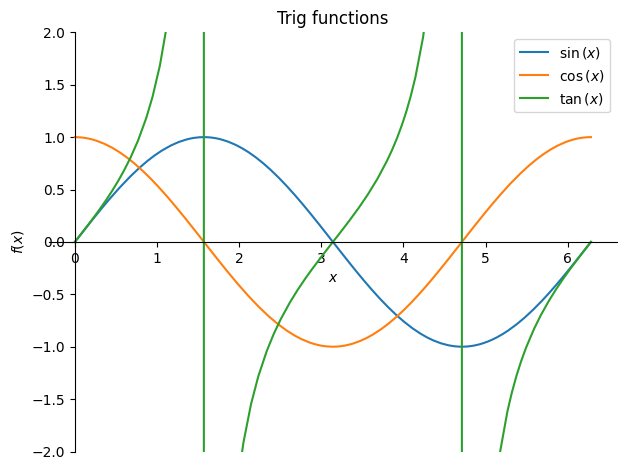

In [ ]:
sp.plot(sp.sin(x), sp.cos(x), sp.tan(x), (x, 0, 2*sp.pi), title="Trig functions", legend=True, ylim=(-2, 2))

It even handles parametric plots:

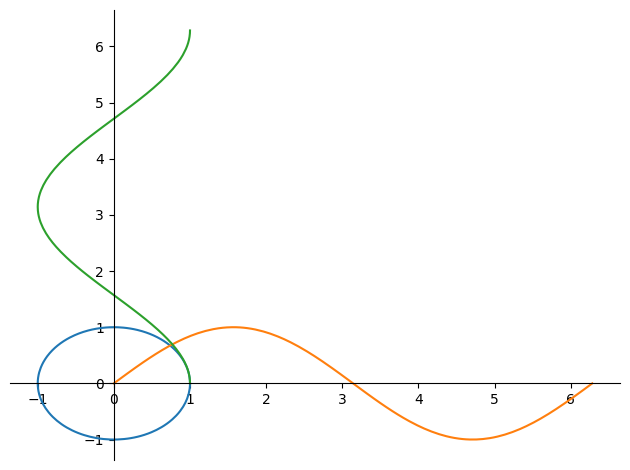

In [ ]:
sp.plot_parametric((sp.cos(z), sp.sin(z)), (z, sp.sin(z)), (sp.cos(z), z), (z, 0, 2*sp.pi))

## Exercises

With your group, go through the notebook above to familiarize yourself with how `sympy` works. Then complete the following exercises below, using `sympy`:

### 1. Function extrema

Consider the function $g(x) = 4 x^3 + 3 x^2 - 6 x - 1$. Find the points $x$ where $g(x)$ is at an extremum (minimum or maximum, not at infinity) and find the values of the function at those points. (Hint: Use a derivative.) Show which extrema are maxima and which are minima. (Hint: Use a second derivative.)

Plot the function in a suitable domain and verify that you found the points and values correctly.

In [ ]:
# create the function g(x)
x = sp.symbols('x')
gx = 4*x**3 + 3*x**2 - 6*x - 1
gx

4*x**3 + 3*x**2 - 6*x - 1

In [ ]:
# take the derivative of g(x)
gxp = sp.diff(gx)
gxp
#make gxp an equation
gxp_eq = sp.Eq(gxp, 0)
gxp_eq

Eq(12*x**2 + 6*x - 6, 0)

In [ ]:
#solve for x and find critical points (location of extrema)
#converts to list to be accessed later
solutions_list = list(sp.solveset(gxp_eq, x))
solutions_list

[-1, 1/2]

In [ ]:
# get second derirvative of gx
gxp2 = sp.diff(gxp)
gxp2

#take value of extrema as variable
val_gxp2e = gxp2.subs(x, -1)
val_gxp2e2 = gxp2.subs(x, 1/2)

#logic for determinding minima or maxima
if (val_gxp2e) > 0:
  print(solutions_list[0], "is minima")
else:
  print(solutions_list[0], "is maximum")

if (val_gxp2e2) > 0:
  print(solutions_list[1], "is minima")
else:
  print(solutions_list[1], "is maxima")


-1 is maximum
1/2 is minima


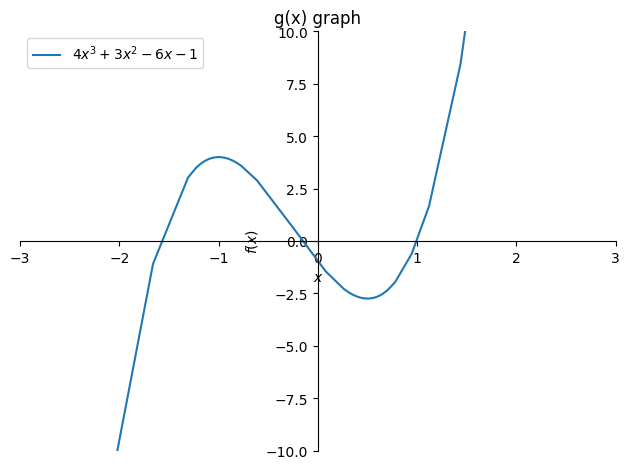

In [ ]:
#plot graph using sp
sp.plot((gx), title="g(x) graph", legend=True, ylim=(-10, 10), xlim=(-3,3))
# the graph shows that there is a maximum at -1 and minima and 1/2,
# this corresponds to our information in the logic

### 2. Particle motion

The parametric equations for the motion of a charged particle released from rest in electric and magnetic fields at right angles to each other take the forms,
$$ x(\theta) = a(\theta - \sin\theta),$$
$$ y(\theta) = a(1 - \cos\theta),$$
with a real constant $a$.

Show that the line tangent to this curve at the point $(x(\theta),y(\theta))$ has the slope $\displaystyle \frac{dy}{dx}(\theta) = \frac{(dy/d\theta)(\theta)}{(dx/d\theta)(\theta)}= \cot(\theta/2)$.

Where does this slope vanish? Where does the slope diverge?

Plot the curve of the particle parametrically to see what this looks like. Explain where the points are on the curve where the slope vanishes or diverges.

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')
theta = sp.symbols('theta')
a = sp.symbols('a', constant=True)

In [ ]:
xtheta = a*(theta - sp.sin(theta))
xtheta

theta - sin(theta)

In [ ]:
ytheta = a*(1 - sp.cos(theta))
ytheta

a*(1 - cos(theta))

In [ ]:
xthetap = sp.diff(xtheta, theta)
xthetap

a*(1 - cos(theta))

In [ ]:
ythetap = sp.diff(ytheta, theta)
ythetap

a*sin(theta)

In [ ]:
exp = ythetap/xthetap
exp

sin(theta)/(1 - cos(theta))

In [ ]:
sp.trigsimp(exp)
exp

sin(theta)/(1 - cos(theta))

In [ ]:
exp2 = sp.cot(theta/2)

eq = sp.Eq(exp, exp2)
solution = sp.solve(eq)
solution

[]

solution being empty means the equality holds true

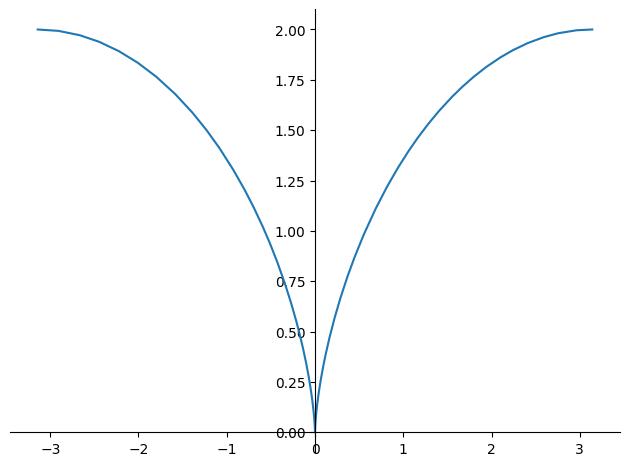

In [ ]:
xtheta_plot = (theta - sp.sin(theta))
ytheta_plot = (1 - sp.cos(theta))
sp.plot_parametric(xtheta_plot, ytheta_plot, (theta, -sp.pi, sp.pi))

### 3. Integration

Find the integral of the following function with respect to $x$, from $x=0$ to $x=x$,
$$g(x) = \frac{x^3 + 5 x^2 + 8 x + 12}{2 x^2 + 10 x + 12},$$
using two different methods:

1. First decompose the function into a sum of simpler partial fractions. Then integrate each term separately with `sp.integrate` and add the results together.
1. Integrate the whole function directly with `sp.integrate`.

Plot both the original function and its integral to see what they look like, in the domain $x\in[-4,1]$.


In [ ]:
gx = (x**3 + 5*x**2 + 8*x + 12)/(2*x**2 + 10*x + 12)
gx

(x**3 + 5*x**2 + 8*x + 12)/(2*x**2 + 10*x + 12)

In [ ]:
sp.integrate(gx)

x**2/4 + 4*log(x + 2) - 3*log(x + 3)

In [ ]:
parts = sp.apart(gx)

In [ ]:
eq1 = x/2
eq1 = sp.integrate(eq1)


In [ ]:
eq2 = (-3)/(x+3)
eq2 = sp.integrate(eq2)

In [ ]:
eq3 = 4/(x+2)
eq3 = sp.integrate(eq3)

In [ ]:
result = eq1 + eq2 + eq3
result

x**2/4 + 4*log(x + 2) - 3*log(x + 3)

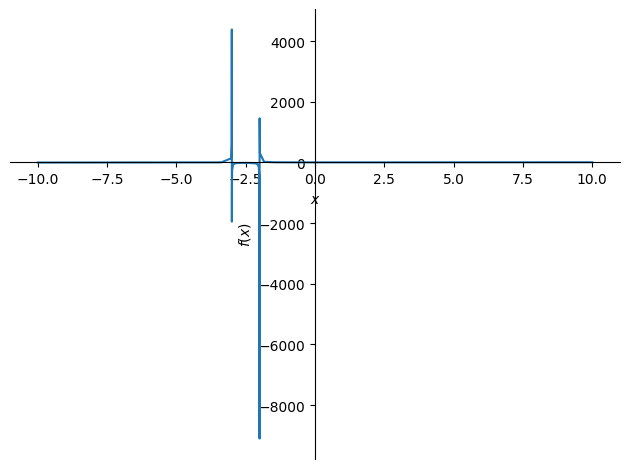

In [ ]:
sp.plot(gx, (x, -4, 1), ())

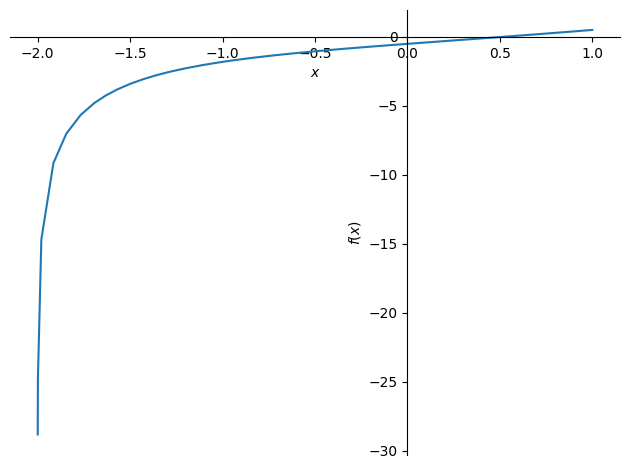

In [ ]:
sp.plot(result, (x, -4,1))

### 4. Gamma function

Define the following function using an integral expression (noting that infinity is `sp.oo`),
$$\Gamma(t) = \int_0^\infty x^{t-1}\,e^{-x} dx.$$
This is known as the "gamma function" when $t>0$ (for real $t$).

Define a *python* function that returns the float value obtained after substituting the given argument for `t` in the defined integral expression for $\Gamma(t)$.

Evaluate this python function for the first 10 positive integers. Do you recognize this function?

In [ ]:
# creating the variables
x, t = sp.symbols("x, t")
# declaring function
gammaf = (x**(t-1))*(sp.exp(-x))
# integrating gammaf from 0 -> infinity
result = sp.integrate(gammaf, (x, 0, sp.oo))
result

Piecewise((gamma(t), re(t) > 0), (Integral(x**(t - 1)*exp(-x), (x, 0, oo)), True))

In [ ]:
# creating function for gamma function
def gamma_function(t):
  #plugs in input t
  gammaf = (x**(t-1))*(sp.exp(-x))
  # returns the value after integrating
  return sp.integrate(gammaf, (x, 0, sp.oo))


In [ ]:
# goes through 1-10 and plugs in the value into the gamma funtion
for i in range(1,11):
  print(gamma_function(i))

1
1
2
6
24
120
720
5040
40320
362880


I do not recognize this function.

## Self-reflection

After you have completed the assignment and cleaned up the notebook to be ready to turn in, answer the following questions:

- Analyze what you found useful about this assignment in your own words. Include any lingering questions or comments that you may have.

I found working with SymPy very useful because these mathematical functions are soon going to become cruical as I start to work with scientific computing more. I knew that it was possible to do all these functions in python somehow, but I never knew how easy it was and how flexible python is with it's syntax.


I really enjoyed this assignment and i'm excited to learn more Python libraries in this class.

 - Please sign the following honor pledge confirming that this is all your work.

> I pledge that all the work in this repository is my own with only the following exceptions: Content of starter files supplied by the instructor; Code borrowed from another source, documented with correct attribution in the code and summarized here.

Signed,

Andrew Bahsoun, Max Richter